HW4 - standard-identification-deeplearning






In this assignment, we work with the classic Iris dataset, which contains morphological measurements for 150 iris plants. Each sample consists of four real-valued features:

-Sepal length (in cm)

-Sepal width (in cm)

-Petal length (in cm)

-Petal width (in cm)

These 150 samples are evenly divided into three distinct classes (50 samples each):

-ω1 → Iris Setosa

-ω2 → Iris Versicolour

-ω3 → Iris Virginica


All dataset files are stored on Google Drive and are loaded into the Colab environment using:

-iris.data → the main dataset containing features and labels

-iris.names → description of features and class labels

-bezdekIris.data, Index → additional metadata or references

Colab code mounts Google Drive and reads each file for further processing.

Objective:
The main goal of HW4 is to design and train a Neural Network (NN) to classify the iris flowers based on their morphological features.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Index = '/content/drive/MyDrive/datasets/IRIS/Index'
bezdekIris = '/content/drive/MyDrive/datasets/IRIS/bezdekIris.data'
iris_data = '/content/drive/MyDrive/datasets/IRIS/iris.data'
iris_names =  '/content/drive/MyDrive/datasets/IRIS/iris.names'

# Read and print the contents of each file
with open(Index, 'r') as file:
    Index = file.read()
    print("Content of 'Index' file:")
    print(Index)
    print("===============================================")

with open(bezdekIris, 'r') as file:
    bezdekIris = file.read()
    print("Content of 'bezdekIris' file:")
    print(bezdekIris)
    print("===============================================")

with open(iris_data, 'r') as file:
    iris_data= file.read()
    print("Content of 'iris_data' file:")
    print(iris_data)
    print("===============================================")

with open(iris_names, 'r') as file:
    iris_names = file.read()
    print("Content of 'iris_names' file:")
    print(iris_names)
    print("===============================================")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Content of 'Index' file:
Index of iris

02 Dec 1996      105 Index
08 Mar 1993     4551 iris.data
30 May 1989     2604 iris.names

Content of 'bezdekIris' file:
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.

Part A – Dataset Splitting (Train/Test)

In this step, the Iris dataset is loaded and split into training and test sets. We randomly divide the samples, using 80% for training and 20% for testing, while ensuring reproducibility by setting a fixed random seed.

Splitting the data ensures that the model is trained on a subset and evaluated on unseen samples, helping us assess its generalization performance.



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (no header in the CSV file)
data = pd.read_csv('/content/drive/MyDrive/datasets/IRIS/iris.data', header=None)

# Separate features and labels
X = data.iloc[:, :-1]  # Feature columns (sepal & petal measurements)
y = data.iloc[:, -1]   # Class labels

# Randomly split into 80% training and 20% test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Output the shapes of the splits
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (120, 4), y_train shape: (120,)
X_test shape: (30, 4), y_test shape: (30,)


Part B: Preprocessing

In this part, we prepare the Iris dataset for training:

1.Label Encoding: We convert string labels ("Iris-setosa", etc.) into numeric values (0, 1, 2) using LabelEncoder.

2.Feature Standardization: We normalize the input features (sepal/petal length and width) using StandardScaler so that each feature has mean 0 and standard deviation 1 — this improves neural network training performance.

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Label Encoding for target values (y) ---
label_encoder = LabelEncoder()

# Fit the encoder on training labels and transform both train and test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display label encoding mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# --- Feature Standardization for input features (X) ---
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show shape of processed data
print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}, y_test_encoded shape: {y_test_encoded.shape}")


Label Encoding Mapping: {'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}
X_train_scaled shape: (120, 4), y_train_encoded shape: (120,)
X_test_scaled shape: (30, 4), y_test_encoded shape: (30,)


Part C: Neural Network Training

We build and train a 2-layer neural network for classifying the Iris dataset:

-Layer 1 (Hidden): 30 neurons with sigmoid activation.

-Output Layer: 3 neurons (for the 3 iris classes) with softmax activation.

-Loss Function: sparse_categorical_crossentropy

-Optimizer: adam

-Training: 30 epochs with batch size 32 and 10% of training data used for validation.

The trained model is evaluated on the test set to compute the final classification accuracy.

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network
model = Sequential()

# First hidden layer with 30 neurons and sigmoid activation
model.add(Dense(30, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Output layer with 3 neurons (for the 3 iris classes) and softmax activation
num_classes = 3
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0000e+00 - loss: 1.3263 - val_accuracy: 0.0000e+00 - val_loss: 1.3371
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 1.3005 - val_accuracy: 0.0000e+00 - val_loss: 1.2928
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0000e+00 - loss: 1.2642 - val_accuracy: 0.0000e+00 - val_loss: 1.2587
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 1.2307 - val_accuracy: 0.0000e+00 - val_loss: 1.2256
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 1.2164 - val_accuracy: 0.0000e+00 - val_loss: 1.1967
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 1.1982 - val_accuracy: 0.0000e+00 - val_loss: 1.1746
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 1.1816 - val_accuracy: 0.0833 - val_loss: 1.1558
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0058 - loss: 1.1738 -

Part D: Evaluation & Visualization

In this part, we perform two tasks:

1.Plot the evolution of test accuracy after each training epoch:

We store and visualize the validation accuracy from the training history to observe how the model improves over time.

2.Compute the confusion matrix on the test set:

After final evaluation, we use the trained model to make predictions on the test set.

We compare the predictions with the true labels using a confusion matrix to assess the classification performance per class.

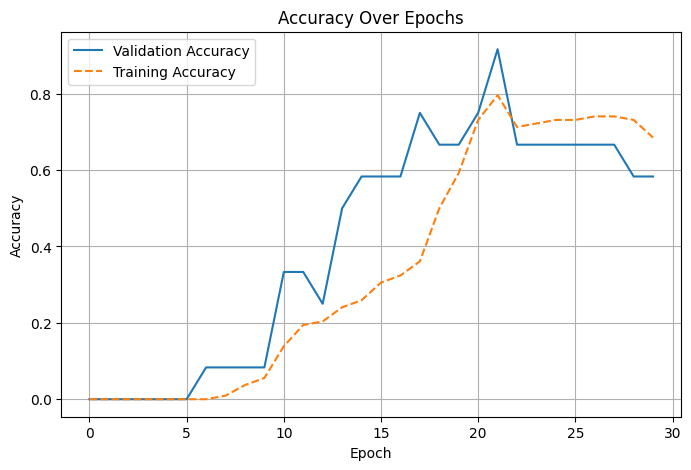

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


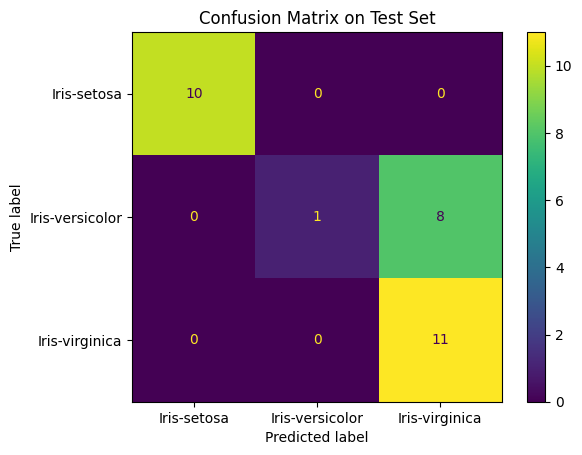

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot validation accuracy over epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='--')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Predict classes on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix on Test Set')
plt.grid(False)
plt.show()


Part E: Retraining with ReLU Activation

In this part, we repeat the training process using a different activation function:

The first hidden layer is now using the ReLU (Rectified Linear Unit) activation function instead of sigmoid.

All other parameters (number of neurons, optimizer, loss function, output layer, training setup) remain unchanged.

ReLU typically accelerates training and is less prone to vanishing gradients compared to sigmoid, especially in deeper networks.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a new model with ReLU activation
model_relu = Sequential()

# First hidden layer with ReLU
model_relu.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer with softmax
model_relu.add(Dense(3, activation='softmax'))

# Compile the model
model_relu.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_relu = model_relu.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate on the test set
test_loss_relu, test_accuracy_relu = model_relu.evaluate(X_test, y_test_encoded)
print(f"Test accuracy with ReLU: {test_accuracy_relu:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3134 - loss: 1.6192 - val_accuracy: 0.4167 - val_loss: 1.4436
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3363 - loss: 1.4235 - val_accuracy: 0.4167 - val_loss: 1.3428
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3395 - loss: 1.3078 - val_accuracy: 0.4167 - val_loss: 1.2702
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.2830 - loss: 1.2342 - val_accuracy: 0.2500 - val_loss: 1.2188
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2141 - loss: 1.1788 - val_accuracy: 0.1667 - val_loss: 1.1722
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0824 - loss: 1.1400 - val_accuracy: 0.0000e+00 - val_loss: 1.1339
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1175 - loss: 1.0957 - val_accuracy: 0.3333 - val_loss: 1.1030
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2150 - loss: 1.0691 - val_accuracy: 0.4167 - val_loss: 1.0787
Epoch 

Part F: Model Comparison – Sigmoid vs. ReLU

In this final part, we compare the two trained neural networks:

Model 1: Hidden layer with Sigmoid activation

Model 2: Hidden layer with ReLU activation


1.Test Accuracy: Direct comparison of final accuracy on the test set.

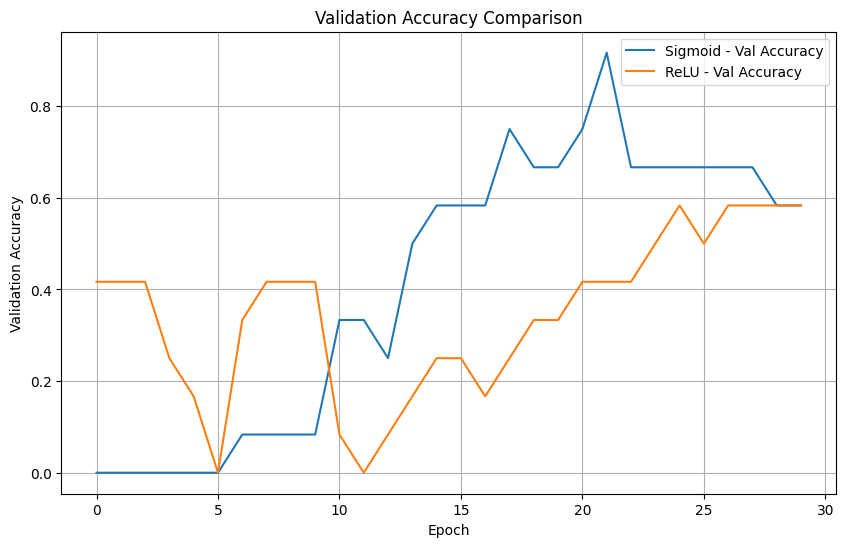

In [18]:


# Plot validation accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['val_accuracy'], label='Sigmoid - Val Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='ReLU - Val Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2.Accuracy Over Epochs: Line plot showing how validation accuracy evolved during training.



In [19]:
print(f"Final Test Accuracy (Sigmoid): {test_accuracy:.4f}")
print(f"Final Test Accuracy (ReLU): {test_accuracy_relu:.4f}")


Final Test Accuracy (Sigmoid): 0.7333
Final Test Accuracy (ReLU): 0.6333


3.Confusion Matrices: Display both confusion matrices to see classification strengths/weaknesses.





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


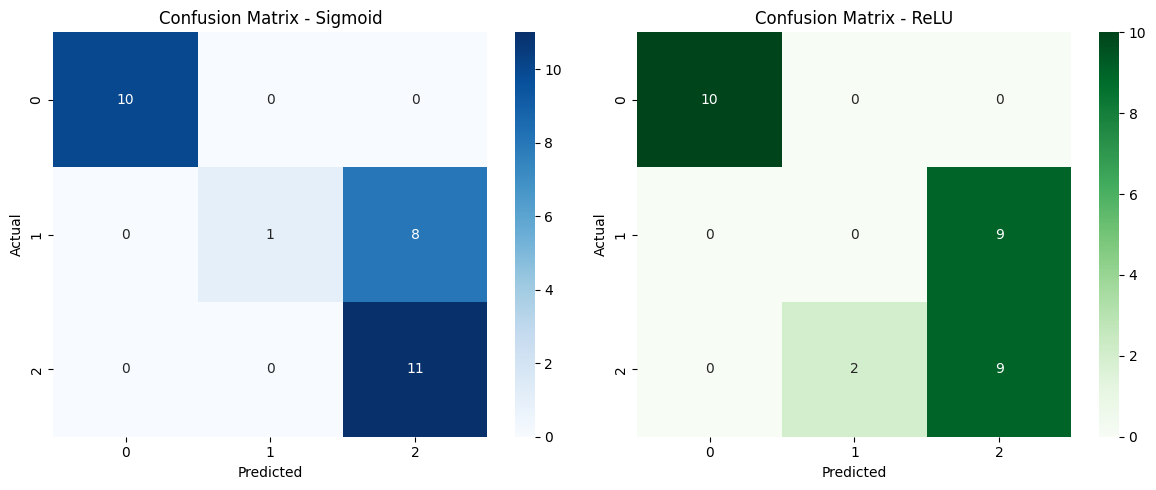

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred_sigmoid = model.predict(X_test).argmax(axis=1)
y_pred_relu = model_relu.predict(X_test).argmax(axis=1)

# Confusion Matrices
cm_sigmoid = confusion_matrix(y_test_encoded, y_pred_sigmoid)
cm_relu = confusion_matrix(y_test_encoded, y_pred_relu)

# Plot Sigmoid Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_sigmoid, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Sigmoid")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Plot ReLU Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_relu, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - ReLU")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()
